In [1]:
%matplotlib inline
from __future__ import division
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import struct
import pickle

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
pd.options.display.max_columns = 999

In [4]:
import sys
sys.path.append('../../src')

In [5]:
from microssembly2 import Microssembly

In [6]:
mssembly = Microssembly(architecture = 4)

In [7]:
data = [1, 2]
mssembly.load_data(data)
mssembly.memory

array([1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
prog = ([
    '110000001000',
    '001110001110',
    '110000011000',
    '001110001110',    
    '110011101111'    
])
len(''.join(prog))

60

In [9]:
mssembly.run(''.join(prog), cycles=100)

['mov [0] [8]', 'add [8] [14]', 'mov [1] [8]', 'add [8] [14]', 'mov [14] [15]']

In [10]:
assert mssembly.memory[15] == np.sum(data), "Something went wrong!!!"

In [11]:
from simple_sum import find_best_model, eval_individual, population

In [12]:
start_pop = [list(map(int, ''.join(prog).ljust(200, '0'))) for _ in range(800)]

In [13]:
pop, hof, _ = find_best_model(ngen=500, pop_size=1000, mutpb=0.001, indpb=0.01, ind_size=200, start_pop=start_pop)

gen	nevals	avg        	std        	min        	max        
0  	1000  	5.16478e-11	2.97222e-11	3.56884e-13	9.98619e-11
1  	1001  	0.01       	0          	0.01       	0.01       
2  	1014  	0.01       	3.13563e-13	0.01       	0.01       
3  	1018  	0.01       	0          	0.01       	0.01       
4  	1016  	0.01       	0          	0.01       	0.01       
5  	1016  	0.01       	0          	0.01       	0.01       
6  	1002  	0.01       	0          	0.01       	0.01       
7  	1034  	0.01       	0          	0.01       	0.01       
8  	1003  	0.01       	0          	0.01       	0.01       
9  	1009  	0.01       	0          	0.01       	0.01       
10 	1009  	0.01       	0          	0.01       	0.01       
11 	996   	0.01       	0          	0.01       	0.01       
12 	982   	0.01       	0          	0.01       	0.01       
13 	990   	0.01       	0          	0.01       	0.01       
14 	1035  	0.01       	0          	0.01       	0.01       
15 	994   	0.01       	0          	0.01       	0.01     

138	1051  	0.01       	8.10309e-12	0.01       	0.01       
139	1036  	0.01       	7.94144e-12	0.01       	0.01       
140	998   	0.01       	8.15653e-12	0.01       	0.01       
141	1012  	0.01       	8.23797e-12	0.01       	0.01       
142	977   	0.01       	9.46689e-12	0.01       	0.01       
143	995   	0.01       	9.04604e-12	0.01       	0.01       
144	1019  	0.01       	9.03642e-12	0.01       	0.01       
145	1017  	0.01       	8.99599e-12	0.01       	0.01       
146	989   	0.01       	8.82695e-12	0.01       	0.01       
147	969   	0.01       	9.29652e-12	0.01       	0.01       
148	1023  	0.01       	9.66797e-12	0.01       	0.01       
149	970   	0.01       	9.18219e-12	0.01       	0.01       
150	962   	0.01       	9.02706e-12	0.01       	0.01       
151	1013  	0.01       	8.68178e-12	0.01       	0.01       
152	965   	0.01       	8.54531e-12	0.01       	0.01       
153	960   	0.01       	8.74409e-12	0.01       	0.01       
154	1014  	0.01       	8.64186e-12	0.01       	0.01     

277	994   	0.01       	1.0494e-11 	0.01       	0.01       
278	998   	0.01       	1.11992e-11	0.01       	0.01       
279	1022  	0.01       	1.17912e-11	0.01       	0.01       
280	975   	0.01       	1.13737e-11	0.01       	0.01       
281	1000  	0.01       	1.09783e-11	0.01       	0.01       
282	1000  	0.01       	1.07076e-11	0.01       	0.01       
283	998   	0.01       	1.02111e-11	0.01       	0.01       
284	1000  	0.01       	9.83637e-12	0.01       	0.01       
285	1042  	0.01       	9.65914e-12	0.01       	0.01       
286	1033  	0.01       	1.06726e-11	0.01       	0.01       
287	950   	0.01       	1.05425e-11	0.01       	0.01       
288	971   	0.01       	1.12621e-11	0.01       	0.01       
289	997   	0.01       	1.0695e-11 	0.01       	0.01       
290	997   	0.01       	9.62266e-12	0.01       	0.01       
291	1035  	0.01       	9.93455e-12	0.01       	0.01       
292	955   	0.01       	9.90381e-12	0.01       	0.01       
293	1000  	0.01       	9.65012e-12	0.01       	0.01     

416	998   	0.01       	1.3523e-11 	0.01       	0.01       
417	982   	0.01       	1.40197e-11	0.01       	0.01       
418	984   	0.01       	1.4234e-11 	0.01       	0.01       
419	986   	0.01       	1.49631e-11	0.01       	0.01       
420	977   	0.01       	1.42514e-11	0.01       	0.01       
421	1029  	0.01       	1.35861e-11	0.01       	0.01       
422	999   	0.01       	1.27882e-11	0.01       	0.01       
423	1004  	0.01       	1.25683e-11	0.01       	0.01       
424	1018  	0.01       	1.03035e-11	0.01       	0.01       
425	999   	0.01       	9.95867e-12	0.01       	0.01       
426	1008  	0.01       	9.44304e-12	0.01       	0.01       
427	1006  	0.01       	1.02556e-11	0.01       	0.01       
428	1002  	0.01       	1.02861e-11	0.01       	0.01       
429	1040  	0.01       	1.03645e-11	0.01       	0.01       
430	987   	0.01       	1.00025e-11	0.01       	0.01       
431	982   	0.01       	9.91189e-12	0.01       	0.01       
432	1008  	0.01       	9.88245e-12	0.01       	0.01     

with open('/Users/vorl/projects/smu/models/MSDS6306/simple_max.pkl', 'rb') as f:
    hof = pickle.load(f)

In [14]:
eval_individual(''.join(map(str, hof[0])))

(3.145914167442484e-11,)

In [15]:
mssembly = Microssembly(architecture = 4)
data = np.random.randint(np.random.randint(1000, size=1)[0], size=4)
mssembly.reset()
mssembly.load_data(data.tolist())
trace = mssembly.run(''.join(map(str, hof[0])))
data, mssembly.memory

(array([37, 23, 35,  7]),
 array([ 37.,  11.,  35.,   7.,   0.,   0.,   0.,   0.,  11.,   0.,   0.,
          0.,   0.,   0., 468., 468.]))

In [16]:
trace

['mov [0] [8]',
 'add [8] [14]',
 'mov [1] [8]',
 'add [8] [14]',
 'mov [14] [15]',
 'dec [1]',
 'jmp [12]',
 'add [8] [14]',
 'mov [1] [8]',
 'add [8] [14]',
 'mov [14] [15]',
 'dec [1]',
 'jmp [12]',
 'add [8] [14]',
 'mov [1] [8]',
 'add [8] [14]',
 'mov [14] [15]',
 'dec [1]',
 'jmp [12]',
 'add [8] [14]',
 'mov [1] [8]',
 'add [8] [14]',
 'mov [14] [15]',
 'dec [1]',
 'jmp [12]',
 'add [8] [14]',
 'mov [1] [8]',
 'add [8] [14]',
 'mov [14] [15]',
 'dec [1]',
 'jmp [12]',
 'add [8] [14]',
 'mov [1] [8]',
 'add [8] [14]',
 'mov [14] [15]',
 'dec [1]',
 'jmp [12]',
 'add [8] [14]',
 'mov [1] [8]',
 'add [8] [14]',
 'mov [14] [15]',
 'dec [1]',
 'jmp [12]',
 'add [8] [14]',
 'mov [1] [8]',
 'add [8] [14]',
 'mov [14] [15]',
 'dec [1]',
 'jmp [12]',
 'add [8] [14]',
 'mov [1] [8]',
 'add [8] [14]',
 'mov [14] [15]',
 'dec [1]',
 'jmp [12]',
 'add [8] [14]',
 'mov [1] [8]',
 'add [8] [14]',
 'mov [14] [15]',
 'dec [1]',
 'jmp [12]',
 'add [8] [14]',
 'mov [1] [8]',
 'add [8] [14]',
 'mo

In [17]:
x = []
x_hat = []
y = []

for i in range(50):
    mssembly = Microssembly(architecture = 4)
    data = np.random.randint(np.random.randint(10000, size=1)[0], size=4)
    mssembly.reset()
    mssembly.load_data(data.tolist())
    trace = mssembly.run(''.join(map(str, hof[0])))
    y.append(i)
    x.append(np.sum(data))
    x_hat.append(mssembly.memory[15])

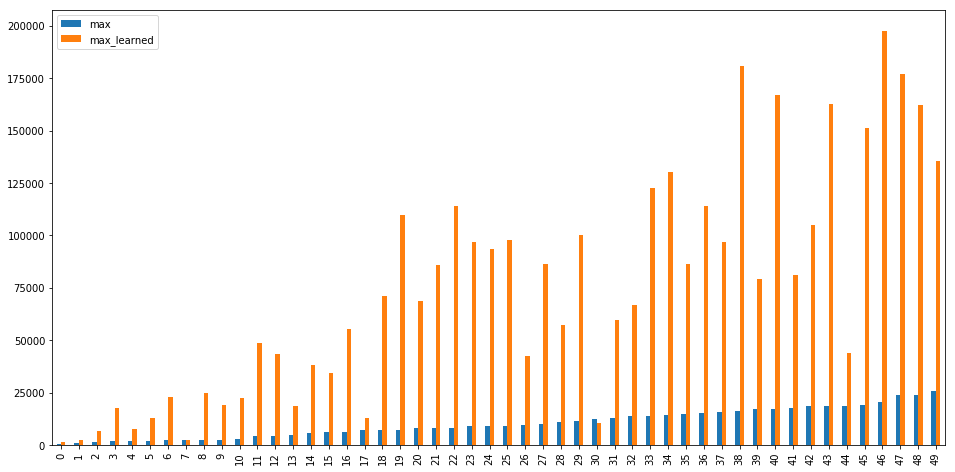

In [18]:
import pandas as pd
df = pd.DataFrame({'max': x, 'max_learned': x_hat}, index=y)
df.sort_values('max').reset_index(drop=True).plot.bar()

In [19]:
''.join(map(str, hof[0]))

'11000000100000111000111011000001100000111000111011001110111100000000000000000000000010110001110101101100000111000001110110100100011110010111101011110011000100111011100110100010111100011101000110100011'

In [20]:
with open('/Users/vorl/projects/smu/models/MSDS6306/simple_sum.pkl', 'wb') as f:
    pickle.dump(hof, f)